In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("car_evaluation.csv")

In [4]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


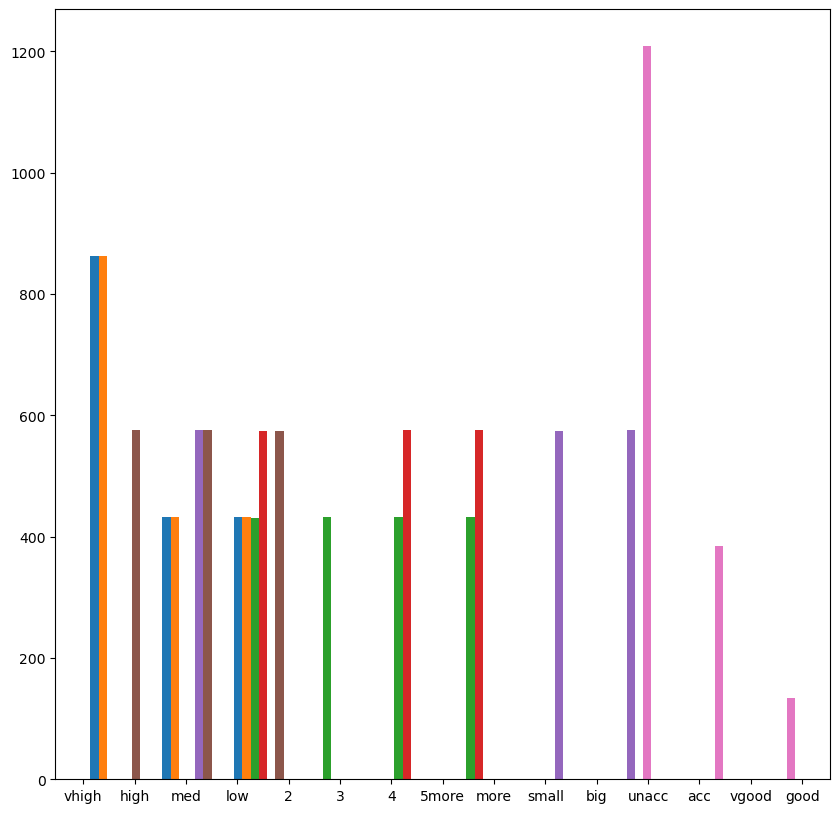

In [6]:
plt.figure(figsize=(10,10))
plt.hist(df)
plt.show()

In [7]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [8]:
df1 = df[['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low']]

In [9]:
df2 = df['unacc']

In [10]:


# Use pandas' get_dummies function to convert categorical variables to dummy variables
dummy_df = pd.get_dummies(df, columns=['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low','unacc'])
dummy_df


,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,2_3,...,small_big,small_med,small_small,low_high,low_low,low_med,unacc_acc,unacc_good,unacc_unacc,unacc_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1723,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(dummy_df, df2, test_size=0.2)

In [ ]:
# Define the hyperparameter grid you want to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier (you can choose a different classifier)
clf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(dummy_df, df2)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# You can also access the best model with grid_search.best_estimator_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(dummy_df)

# Evaluate the model on the training data (you should use a separate test set in practice)
accuracy = accuracy_score(df2, y_pred)
print("Training Accuracy: {:.2f}%".format(accuracy * 100))


In [12]:
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00        74
        good       1.00      1.00      1.00         9
       unacc       1.00      1.00      1.00       250
       vgood       1.00      1.00      1.00        13

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



In [13]:

model = RandomForestClassifier()  # Replace with your model of choice
model.fit(dummy_df, df2)
importances = model.feature_importances_

# Select the top N features based on importances
top_features = dummy_df.columns[importances.argsort()[:5]]
top_features


Index(['2_3', '2_4', '2_5more', 'small_med', '2_2'], dtype='object')

In [14]:
# Select the selected features from the original DataFrame 'df'
selected_features_df = dummy_df[top_features]



In [15]:
 X_train, X_test, y_train, y_test = train_test_split(selected_features_df, df2, test_size=0.2)

In [16]:
# Define the hyperparameter grid you want to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier (you can choose a different classifier)
clf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to your data
grid_search.fit(selected_features_df, df2)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# You can also access the best model with grid_search.best_estimator_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(selected_features_df)

# Evaluate the model on the training data (you should use a separate test set in practice)
accuracy = accuracy_score(df2, y_pred)
print("Training Accuracy: {:.2f}%".format(accuracy * 100))


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 70.01%
Training Accuracy: 70.01%


In [17]:
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Accuracy: 70.23%
              precision    recall  f1-score   support

         acc       0.00      0.00      0.00        81
        good       0.00      0.00      0.00        13
       unacc       0.70      1.00      0.83       243
       vgood       0.00      0.00      0.00         9

    accuracy                           0.70       346
   macro avg       0.18      0.25      0.21       346
weighted avg       0.49      0.70      0.58       346



In [18]:
best_model.predict([[1,34,67,23,65]])

array(['unacc'], dtype=object)

In [19]:
clf.predict([[123,456,21,12,34]])

array(['unacc'], dtype=object)